---
title: "Happy Leap Day"
date: 2016-02-29
authors:
- catherine
tags:
- ipython
excerpt: "Got some IPython for you!"
description: "Some stuff."
image: 
---

# Instructions

1. `git checkout -b myawesomeblogpost` to put this in its own branch
1. Copy this file to `yyyy-mm-dd-your-post-title.ipynb` here in the `jupyter/` folder; switch to that copy
1. Edit the top cell (the front matter) with real data
1. Save the notebook
1. Edit the cell beneath this to set `notebookname` to your actual value for yyyy-mm-dd-your-post-title
1. Add Markdown and code cells to the bottom to make a wonderful blog post
1. Execute the two cells right after this one to generate `yyyy-mm-dd-your-post-title.md`

In [11]:
notebookname = '2016-02-29-happy-leap-day'  # SET THIS to match your own!  Omit .ipynb
# notebookname = 'yyyy-mm-dd-your-post-title'  # SET THIS to match your own!  Omit .ipynb

In [12]:
# Use nbconvert to generate an .md version of the notebook
!rm -rf {notebookname}_files
!ipython nbconvert --to markdown {notebookname}.ipynb

# set up a directory under `assets` to put the generated images in
image_dest = '../assets/blog/jupyter/{}/'.format(notebookname) 
!rm -rf {image_dest}
!mkdir -p {image_dest}
!cp {notebookname}_files/*.* {image_dest}

# now get the .md content for more transformations
converted_notebook_filename = '{}.md'.format(notebookname)
with open(converted_notebook_filename) as infile:
    content = infile.read()

# point image links to their new home
import re
image_pattern = re.compile(r'^(!\[png\])\((.*?\/(.*?))\)$', re.DOTALL | re.MULTILINE)
image_url = r'![plot]({{site.baseurl}}/assets/blog/jupyter/%s/\3)' % notebookname
content = image_pattern.sub(image_url, content)

# remove these boilerplate cells
directions_remove_pattern = re.compile(r'^# Instructions.*?^# Add your own cells below this cell', re.DOTALL | re.MULTILINE)
content = directions_remove_pattern.sub('', content)

# remove leading blank line so that top cell becomes functional jekyll front matter
content = '\n'.join(content.splitlines()[1:])

# write the transformed content and place in `_posts`
with open(converted_notebook_filename, 'w') as outfile:
    outfile.write(content)
!mv {converted_notebook_filename} ../_posts

[NbConvertApp] Converting notebook 2016-02-29-happy-leap-day.ipynb to markdown
[NbConvertApp] Support files will be in 2016-02-29-happy-leap-day_files/
[NbConvertApp] Making directory 2016-02-29-happy-leap-day_files
[NbConvertApp] Writing 37806 bytes to 2016-02-29-happy-leap-day.md


# Add your own cells below this cell

In [14]:
from api_key import api_key
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
qry_base = 'https://api.open.fec.gov/v1/'
qry_detail = 'communication-costs/?per_page=100&sort_nulls_large=true&page=1'
qry = '{qry_base}{qry_detail}&api_key={api_key}'.format(**locals())

In [6]:
response = requests.get(qry)

In [22]:
df = pd.DataFrame(response.json()['results'])

In [11]:
df

,candidate_id,candidate_name,candidate_office,candidate_office_district,candidate_office_state,candidate_party_affiliation,committee_id,committee_name,communication_class,communication_type,...,receipt_date,report_year,schedule_type_code,state_full,sub_id,support_oppose_indicator,tran_id,transaction_amount,transaction_date,transaction_type
0,H0FL12010,"SHAW, EUGENE CLAY JR",H,12,FL,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,FLORIDA,3062020110012946971,S,429288,52,1980-08-13T00:00:00,24F
1,H0FL12010,"SHAW, EUGENE CLAY JR",H,12,FL,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,FLORIDA,3062020110012946972,S,429285,27,1980-08-12T00:00:00,24F
2,H0FL12010,"SHAW, EUGENE CLAY JR",H,12,FL,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,FLORIDA,3062020110012946973,S,429284,10,1980-08-14T00:00:00,24F
3,H0FL12010,"SHAW, EUGENE CLAY JR",H,12,FL,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,FLORIDA,3062020110012946974,S,429283,2,1980-08-12T00:00:00,24F
4,S0IA00028,"GRASSLEY, CHARLES E",S,00,IA,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,IOWA,3062020110012946975,S,429152,1,1980-08-13T00:00:00,24F
5,H0SD02019,"ROBERTS, CLINT",H,02,SD,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,SOUTH DAKOTA,3062020110012946976,S,429151,1,1980-08-12T00:00:00,24F
6,H8TX05011,"PAUKEN, THOMAS W",H,05,TX,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,TEXAS,3062020110012946977,S,429149,5,1980-08-13T00:00:00,24F
7,H8TX05011,"PAUKEN, THOMAS W",H,05,TX,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,TEXAS,3062020110012946978,S,429147,12,1980-08-12T00:00:00,24F
8,H0SC06153,"NAPIER, JOHN L.",H,06,SC,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,SOUTH CAROLINA,3062020110012946979,S,429146,1,1980-08-12T00:00:00,24F
9,H0SC01014,"HARTNETT, THOMAS FORBES SR",H,01,SC,REP,C70000872,CHAMBER OF COMMERCE OF THE U.S.,None,None,...,1980-09-19 00:00:00,1980,F76,SOUTH CAROLINA,3062020110012946980,S,429142,1,1980-08-12T00:00:00,24F


In [23]:
%matplotlib inline

In [24]:
plt.figure()

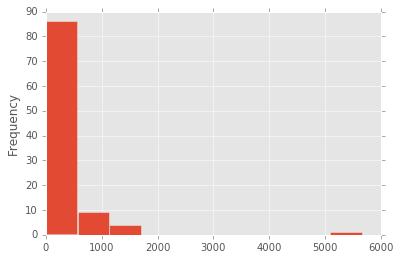

In [25]:
df.transaction_amount.plot(kind='hist')